## Answer 0 (Data Set Preparation)

### Selection an Engineering Dataset

**Purpose**: The goal of this dataset is to predict the weather conditions based on the features of this dataset.


**Link and Citation of the dataset**:
I have collected this dataset from Kaggle for this assignment, as you required. The link and citation of the dataset are below.

https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset?resource=download,

citation: fedesoriano. (April 2022). Wind Speed Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset

### Description of the dataset

**About Datset**:

The Wind Speed Prediction Dataset is important for weather experts who need accurate wind forecasts for severe weather alerts. Collected from 1961 to 1978, it has over 6,500 daily readings from a weather station in an empty field 21 metres above sea level. The station tracks not just wind but also rain and temperatures. This detailed information helps scientists understand how factors like storms and tornadoes develop, which can cause major damage like power outages and destruction to forests and buildings. The dataset is useful for both looking back at past weather and improving future wind speed predictions.

\
**Attributes Information of the Dataset**:

Date (Formatted as YYYY-MM-DD)\
Wind Speed Avg: Mean wind velocity measured in knots \
First Indicator: Initial indicator metric \
Precipitation: Rainfall amount in millimeters\
Second Indicator: Subsequent indicator metric\
Max Temp: Peak temperature in degrees Celsius\
Third Indicator: Additional indicator value\
Min Temp: Lowest temperature in degrees Celsius\
Grass Min Temp at 09 UTC: Minimum temperature on grass surface measured at 09:00 UTC in degrees Celsius.


### Mounted the dataset

In [3]:
# Mount the drive
from google.colab import  drive
drive.mount('/content/drive/')

Mounted at /content/drive/


So, my drive is mounted now!

### Import Library

First, I will import the Pandas library to upload the selected data as a dataframe.

In [4]:
# Import pandas library as pd
import pandas as pd

In [5]:
# Assume, the name of dataset is wind_predict

#wind_predict = pd.read_csv('/content/drive/MyDrive/Sample_Data/Engineering_Data/wind_dataset.csv', index_col='DATE')

wind_predict = pd.read_csv('/content/drive/MyDrive/Sample_Data/Engineering_Data/wind_dataset.csv')

In [6]:
# Print first 5 rows of this dataset
wind_predict.head(5)

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


### Find the total number of rows and columns

In [7]:
# Find number of rows and colums of the Dataset
number_rows, number_colms = wind_predict.shape
print(f'The dataset has {number_rows} rows and {number_colms} columns.')

The dataset has 6574 rows and 9 columns.


In [8]:
print(wind_predict.columns)

Index(['DATE', 'WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN',
       'T.MIN.G'],
      dtype='object')


### Before analysis, I want to make sure that the dataset is clean and well-prepared. Remove any missing or inconsistent values.

In [9]:
## Remove columns from the data set:
wind_predict = wind_predict.drop(columns=['DATE','IND', 'IND.1', 'IND.2', 'T.MIN.G'], axis=1)

### Identify the Null Values

If the dataset has null values, then by using this code we can count the numbers of the null values.

In [10]:
print(wind_predict.isnull().sum())

WIND       0
RAIN       0
T.MAX    621
T.MIN    674
dtype: int64


### Removing the null values

By using the code below we can remove the naull values

In [11]:
wind_predict.dropna(inplace=True)
print(wind_predict.isnull().sum())

WIND     0
RAIN     0
T.MAX    0
T.MIN    0
dtype: int64


In [12]:
# After removing the null velues
# First 5 lines of this dataset after removing NUll:
wind_predict.head(5)

,WIND,RAIN,T.MAX,T.MIN
0,13.67,0.2,9.5,3.7
1,11.50,5.1,7.2,4.2
2,11.25,0.4,5.5,0.5
3,8.63,0.2,5.6,0.4
4,11.92,10.4,7.2,-1.5


In [13]:
# Get the number of rows and columns
(rows, columns) = wind_predict.shape

print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 5898
Number of Columns: 4


Finally, after removing the null values, I got this dataset called wind_predict. In this dataset, there are 5898 rows and 4 columns, which I have rearranged for my future machine learning models.

## Removing outliers from the dateset

In [14]:
# Removing outliers using IQR
Q1 = wind_predict.quantile(0.25)
Q3 = wind_predict.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers by keeping only valid data
wind_predict = wind_predict[~((wind_predict < (Q1 - 1.5 * IQR)) | (wind_predict > (Q3 + 1.5 * IQR))).any(axis=1)]

print(wind_predict)


       WIND  RAIN  T.MAX  T.MIN
0     13.67   0.2    9.5    3.7
2     11.25   0.4    5.5    0.5
3      8.63   0.2    5.6    0.4
5     10.67   0.0    6.5    1.2
6      9.17   1.9    9.2   -2.4
...     ...   ...    ...    ...
6560   2.42   0.1    6.9   -3.5
6561   4.75   0.0    8.1   -3.4
6563  11.67   4.2    5.2   -5.0
6564   2.46   1.9    6.4   -2.1
6573  19.25   0.5    1.2   -1.5

[5129 rows x 4 columns]


In [15]:
## Lets gather some information about the wind predited dataset
wind_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5129 entries, 0 to 6573
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WIND    5129 non-null   float64
 1   RAIN    5129 non-null   float64
 2   T.MAX   5129 non-null   float64
 3   T.MIN   5129 non-null   float64
dtypes: float64(4)
memory usage: 200.4 KB


####  So, our new dataset is very good for data visualisation and manipulation.

### Make a categorical dataset

My original data set has no categorical attribute. But, I want to play with this dataset. So, let's make simple statistics of the dataset to create a categorical data column. I have chosen the median value to differentiate the two categorical regions. See below my strategy for this dataset.

In [16]:
# Creating a list called numerical feature
numerical_features = ['WIND', 'RAIN', 'T.MAX', 'T.MIN']

In [17]:
# Simple relevant statistics of the wind_predict dataset

wind_median_value = wind_predict['WIND'].median()
rain_median_value = wind_predict['RAIN'].median()
max_temp_median_value = wind_predict['T.MAX'].median()
min_temp_median_value = wind_predict['T.MIN'].median()

print("The median of WIND attribute is", wind_median_value)
print("The median of RAIN attribute is", rain_median_value)
print("The median of T.MAX attribute is", max_temp_median_value)
print("The median of T.MIN attribute is", min_temp_median_value)

The median of WIND attribute is 8.92
The median of RAIN attribute is 0.1
The median of T.MAX attribute is 13.4
The median of T.MIN attribute is 6.5


In [18]:
# Create the categorical data column of the Dataset.
#  Here I denoted as windy = 0, calm = 1,

def categorical_data_column(row):
    # if row['T.MAX'] > max_temp_median_value and row['RAIN'] < rain_median_value:
    if row['WIND'] > wind_median_value and row['T.MAX'] < max_temp_median_value:
        return 0
    else:
        return 1

# Now print the new dataset with a column called ClimateCategory
wind_predict['WeatherType'] = wind_predict.apply(categorical_data_column, axis=1)


In [19]:
# Lets see the first five rows of our new dataset
wind_predict.head(5)

,WIND,RAIN,T.MAX,T.MIN,WeatherType
0,13.67,0.2,9.5,3.7,0
2,11.25,0.4,5.5,0.5,0
3,8.63,0.2,5.6,0.4,1
5,10.67,0.0,6.5,1.2,0
6,9.17,1.9,9.2,-2.4,0


### Check the dimension of the dataset

In [20]:
# Seperating the Hot and Calm data:
windy = wind_predict[wind_predict.WeatherType == 0]
calm = wind_predict[wind_predict.WeatherType == 1]

#check the shape"
print(windy.shape)
print(calm.shape)

(1520, 5)
(3609, 5)


In [21]:
# Statistics of the wind predict dataset: mean, median, standard deviation, minimum, and maximum values for every columns in the Dataset
wind_predict.drop(columns='WeatherType').describe().T

,count,mean,std,min,25%,50%,75%,max
WIND,5129.0,9.417578,4.702602,0.0,5.79,8.92,12.46,23.25
RAIN,5129.0,0.698694,1.130883,0.0,0.00,0.10,1.00,4.70
T.MAX,5129.0,13.462917,4.902854,0.0,9.80,13.40,17.40,26.80
T.MIN,5129.0,6.452154,4.603356,-7.4,3.10,6.50,10.00,18.00


### Now, My Dataset is ready to make the solutions of question 01 and question 02.

## ANSWER 01

Overall, the aim of question 1 is to foster an understanding of the practical aspects of training, tuning, evaluating, and interpreting machine learning models. I will follow the requirement of 1 to 5 of question 1 exactly in the next cells.

Import all other libraries

In [22]:
# import necessary libraries for numpy array, plot, and density visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Preprocessing

In [23]:
# Count categorical and others feature name
cate_val =[]
cont_val =[]

for column in wind_predict.columns:
    if wind_predict[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [24]:
# Categorical attribute
cate_val

['WeatherType']

In [25]:
# All other features
cont_val

['WIND', 'RAIN', 'T.MAX', 'T.MIN']

In [26]:
# Count the wind_predict dataset for the categorical values
wind_predict['WeatherType'].value_counts()

1    3609
0    1520
Name: WeatherType, dtype: int64

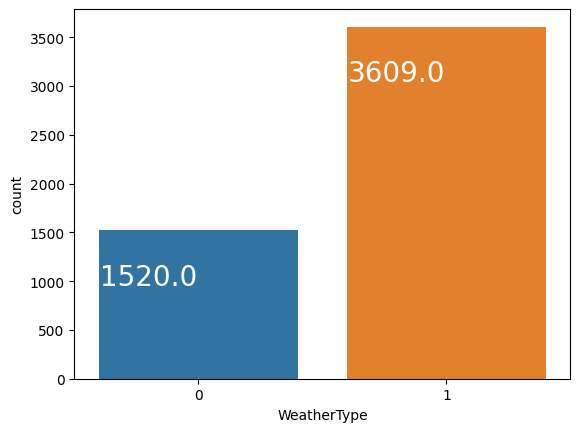

In [27]:
# Now create a bar diagram for the categorial column
ax=sns.countplot(x=wind_predict['WeatherType'], data=wind_predict);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20)

The bar diagrams describe the data numbers for 0 == windy, and 1 == Calm.

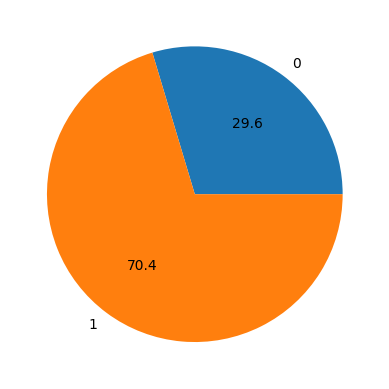

In [28]:
 # import pylab becuz need to remove ylabel
import pylab
wind_predict.groupby('WeatherType').size().plot(kind = 'pie', autopct = '%.1f')
pylab.ylabel('')
plt.savefig("percentage-target.png", bbox_inches='tight')

The pie chart tells us the percentage of the categorical column.

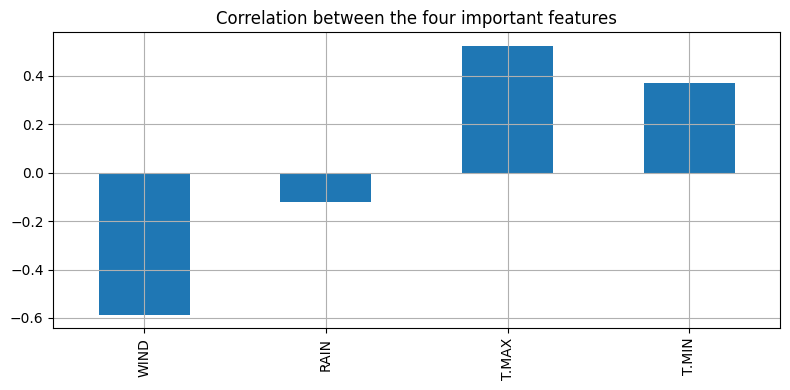

In [29]:
## MAke the correlation plot
wind_predict.drop('WeatherType', axis=1).corrwith(wind_predict.WeatherType).plot(kind='bar', grid=True, figsize=(8, 4),
                                                        title="Correlation between the four important features")
plt.tight_layout()
# plt.savefig("corr_target.png", bbox_inches='tight')

The features T.MAX and T.MIN are closely correlated but they have anti-correlation with the wind feature, which means higer windy implies lower temperature.

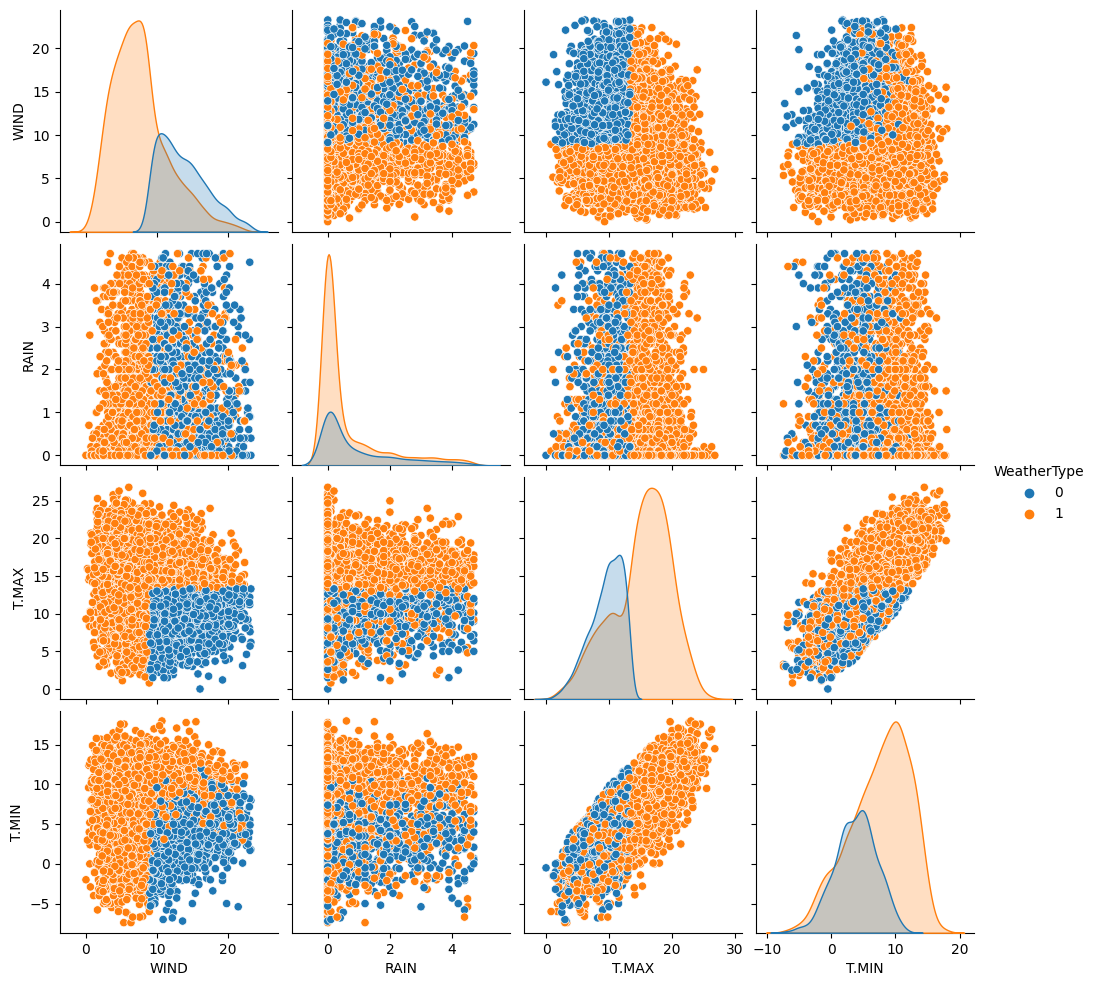

In [30]:
# Now the pairplot of scaled dataset
sns.pairplot(data = wind_predict, hue='WeatherType')

### Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
ST = StandardScaler()
wind_predict[cont_val] = ST.fit_transform(wind_predict[cont_val])

wind_predict.head()

<ipython-input-67-a68803519d0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_predict[cont_val] = ST.fit_transform(wind_predict[cont_val])


,WIND,RAIN,T.MAX,T.MIN,WeatherType
0,0.904358,-0.441020,-0.808367,-0.597917,0
2,0.389699,-0.264150,-1.624297,-1.293129,0
3,-0.167493,-0.441020,-1.603899,-1.314855,1
5,0.266351,-0.617890,-1.420315,-1.141051,0
6,-0.052652,1.062376,-0.869561,-1.923166,0


### Spliting the data set into Training set and Test set

In [ ]:
# Dependent variables
X = wind_predict.drop(['WeatherType'], axis=1)
X.head()

,WIND,RAIN,T.MAX,T.MIN
0,0.904358,-0.441020,-0.808367,-0.597917
2,0.389699,-0.264150,-1.624297,-1.293129
3,-0.167493,-0.441020,-1.603899,-1.314855
5,0.266351,-0.617890,-1.420315,-1.141051
6,-0.052652,1.062376,-0.869561,-1.923166


In [ ]:
# Independent variables
y = wind_predict['WeatherType']
y.head()

0    0
2    0
3    1
5    0
6    0
Name: WeatherType, dtype: int64

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split (X, y, test_size=0.25, random_state=42)
X_train.head()


,WIND,RAIN,T.MAX,T.MIN
1239,0.353545,-0.61789,0.966283,0.814234
5969,0.096216,-0.08728,-0.339206,-0.098232
2776,-0.124960,-0.61789,1.129469,0.770784
5584,-0.628985,-0.61789,0.435928,-0.445839
6300,-1.001156,-0.44102,-0.604384,-0.206859


In [ ]:
#Lets check for X_test and y_test
X_test.head()

,WIND,RAIN,T.MAX,T.MIN
5353,-0.239801,2.035162,0.762300,1.770152
4339,0.311012,1.150811,-0.828765,-2.031793
2362,0.408839,0.001155,0.884690,0.640431
5624,-0.488624,-0.617890,0.109556,-0.098232
4322,-0.035639,-0.617890,0.129954,-1.162777


In [ ]:
y_test.head()

5353    1
4339    0
2362    1
5624    1
4322    1
Name: WeatherType, dtype: int64

In [ ]:
# print the shape X and y
print(X.shape)
print(y.shape)


(5129, 4)
(5129,)


In [ ]:
# print the shape X_train and y_train
print(X_train.shape)
print(y_train.shape)

(3846, 4)
(3846,)


In [ ]:
# print the shape X_shape and y_shape
print(X_test.shape)
print(y_test.shape)

(1283, 4)
(1283,)


### My dataset is ready to make the machine learning modelling

## Modelling

I want to concentrate on your class lectures. Based on your class lectures and assignment 2, I chose the following three models for the task:


1. Logistic Regression
2. Random Forest Classifier
3.KNN


### 1. Logistic Regression

Train your models by applying an appropriate training/test split

In [ ]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression
# accuracy_score import from sklearn
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# y_pred_logistic regarding X_test valuse
y_predict_lr = lr.predict(X_test)
y_predict_lr

array([1, 0, 1, ..., 0, 0, 0])

### Explore how using regularization can improve it?

Regularization helps prevent overfitting by adding a penalty to the loss function the algorithm is trying to minimize. This can make the model generalize better to unseen data. The logistic regression in scikit-learn provides L1 (Lasso) and L2 (Ridge) regularization via the penalty parameter and the strength of the regularization is controlled by the C parameter (inverse of regularization strength; smaller values specify stronger regularization).

Using L2 Regularization (Ridge):
Similar to L1, experiment with different values of C.

In [ ]:
# Regularization for L2: legularization_logistic_l2
# C is the inverse of regularization strength; smaller values specify stronger regularization.
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    legularization_lr_l2 = LogisticRegression(penalty='l2', C=c, max_iter=10000)
    legularization_lr_l2.fit(X_train, y_train)
    ypred = legularization_lr_l2.predict(X_test)
    print(f"Accuracy for C={c}:", accuracy_score(y_test, ypred))

Accuracy for C=0.001: 0.8106001558846454
Accuracy for C=0.01: 0.8706157443491817
Accuracy for C=0.1: 0.8745128604832424
Accuracy for C=1: 0.8799688230709275
Accuracy for C=10: 0.8799688230709275
Accuracy for C=100: 0.8799688230709275


In [ ]:
# Create logistic regression model with L2 regularization
# Note: C is the inverse of regularization strength; smaller values specify stronger regularization.
legularization_lr = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', random_state=42)

# Train the model
legularization_lr.fit(X_train, y_train)

# Predict on test set
y_pred_legularization_lr = legularization_lr.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred_legularization_lr)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 88.00%


### Create visuals for Logistric Regression (LR)

ROC and AUC curve of LR

<Figure size 640x480 with 0 Axes>

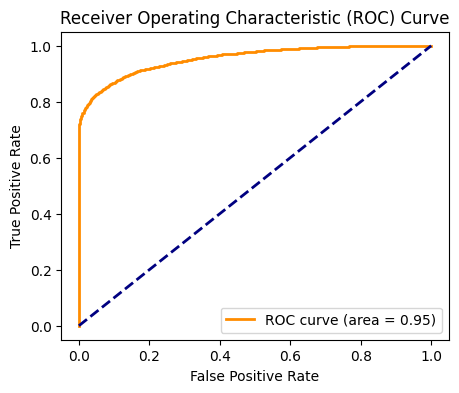

In [ ]:
# import libraries
from sklearn.metrics import roc_curve, auc

 # Probability estimates for the positive class
y_prob_lr = lr.predict_proba(X)[:, 1]

fpr, tpr, _ = roc_curve(y, y_prob_lr)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='g')
plt.show()



The ROC curve (Receiver Operating Characteristic) is a graphical representation of a model's true positive rate versus its false positive rate at various thresholds. It's used to assess the performance of binary classifiers. The curve shows the trade-off between sensitivity (or recall) and specificity. A diagonal line represents random guessing, and a curve closer to the top-left corner indicates better performance. The area under the ROC curve (AUC) quantifies the overall discriminative power of the model.


AUC, or Area Under the Curve, refers to the area under the ROC curve (Receiver Operating Characteristic). The ROC curve plots the true positive rate against the false positive rate at various threshold settings. AUC measures the model's ability to distinguish between positive and negative classes. A value of 1 indicates perfect discrimination, while 0.5 suggests no better than random guessing. Higher AUC values indicate better model performance. Here, I got area under curve is 0.95, which is far better.

Precision and Recall for LR

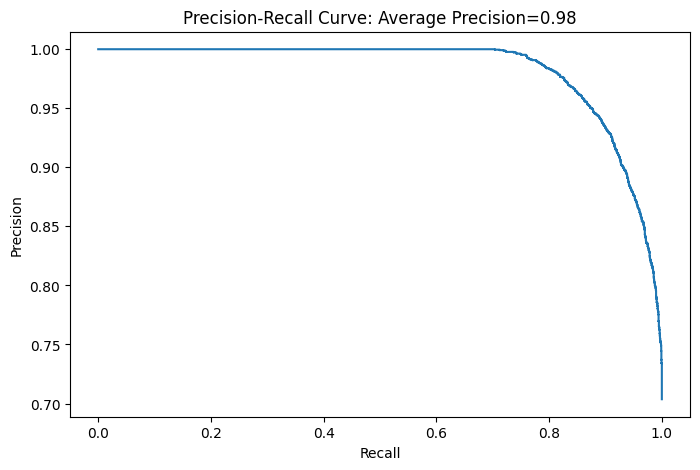

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_prob_lr)
average_precision = average_precision_score(y, y_prob_lr)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve: Average Precision={average_precision:.2f}')
#plt.fill_between(recall, precision, step='post', alpha=0.2, color='g')
plt.show()

In the plot, a high area under the curve represents both high precision and high recall, which is desirable. The average precision (AP) summarizes the shape of the curve, providing a single number to indicate the performance of the prediction.

Residual curve of LR

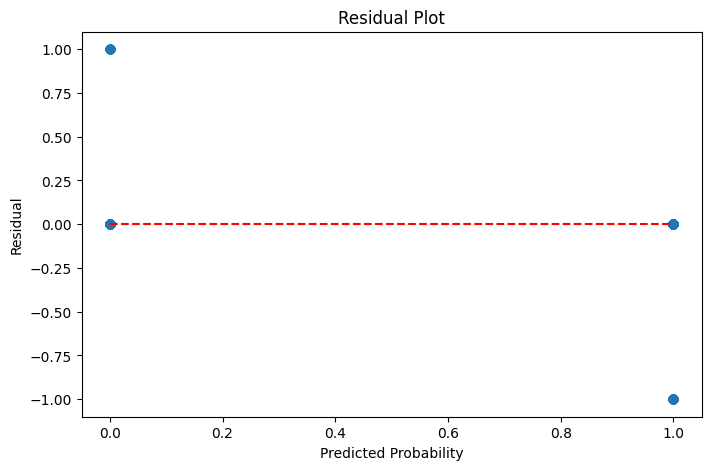

In [ ]:
residuals = y_test - y_predict_lr

plt.figure(figsize=(8, 5))
plt.scatter(y_predict_lr, residuals, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.hlines(0, min(y_predict_lr), max(y_predict_lr), colors='r', linestyles='--')
plt.show()


 Each point on the scatter plot represents an individual observation. The x-coordinate is the predicted probability by the model, and the y-coordinate is the corresponding residual.

  This line at 0 is a reference. Residuals above this line mean the model under-predicted the actual value; those below mean it over-predicted.

### LR classification report and the confusion matrix

In [ ]:
# Create f1-score, cf matrix
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, classification_report)

In [ ]:
cf_matrix_lr = confusion_matrix(y_predict_lr, y_test)
cf_matrix_lr

array([[303,  64],
       [ 90, 826]])

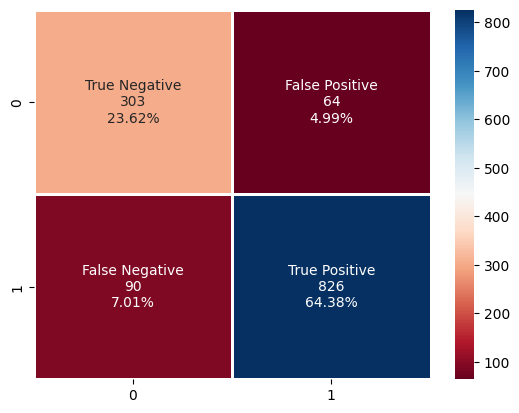

In [ ]:
# print the confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_lr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_lr.flatten()/np.sum(cf_matrix_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_lr, annot=labels, fmt='', linewidths=2 ,cmap='RdBu')
plt.savefig("confuMatrix_LR.png", bbox_inches='tight')


In [ ]:
#Classification report:
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       393
           1       0.90      0.93      0.91       890

    accuracy                           0.88      1283
   macro avg       0.86      0.85      0.86      1283
weighted avg       0.88      0.88      0.88      1283



This report offers a comprehensive view of the classifier's performance across different classes.

Classification report for LR model:

Precision: Of the instances predicted as positive, how many were correctly predicted. Precision = True Positives / (True Positives + False Positives). Here, precision for '0' is 0.83 and precision for '1' is 0.90, which implies that a low rate of false positives.

Recall (Sensitivity): Of all actual positive instances, how many were correctly predicted. High recall indicates most actual positives are captured by the model. Recall = True Positives / (True Positives + False Negatives).

F1-Score: Harmonic mean of precision and recall, providing a balance between the two. Ranges between 0 (worst) and 1 (best). A higher F1 score indicates better model performance. So, this performed better acording the F1-Score.

Support: Number of actual occurrences of each class in the dataset.

Accuracy: Overall percentage of correctly predicted instances. Here, accuracy is 0.88.


### Calculate and visualize feature importance of LR

feature importance from coefficients:

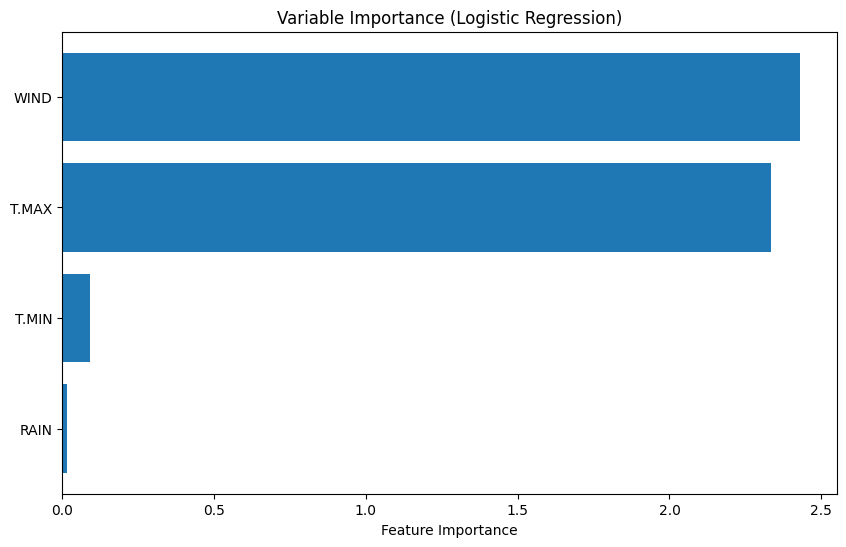

In [ ]:
# Get feature importance from coefficients
feature_importance = abs(lr.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Variable Importance (Logistic Regression)')
plt.show()

Interpreting the Results:
In this Figure, the feature importance is visualized in a horizontal bar chart. Features with larger coefficients (in magnitude) will have longer bars, implying greater importance in the model. In this case, 'WIND' feature has greateer importancs in this model.

Permutaion Importance

Personally, I want to study the importance of the permutation feature. In the next project and in my research, I want to apply this technique to find the important features of the simulated dataset.

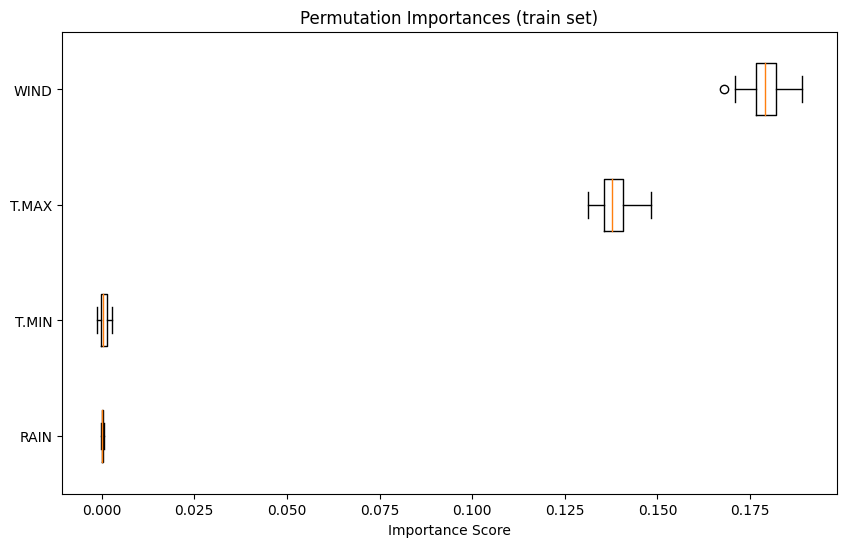

In [ ]:
# import the permutation importance
from sklearn.inspection import permutation_importance

# Calculate permutation importances
result = permutation_importance(lr, X, y, n_repeats=30, random_state=42)
sorted_idx = result.importances_mean.argsort()

# Visualize the permutation importances
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(X.columns)[sorted_idx])
plt.title("Permutation Importances (train set)")
plt.xlabel("Importance Score")
plt.show()

Interpreting the Permutation Importances through Box plot:

In this visualization, the permutation importances are shown as box plots. The box represents the interquartile range (IQR) of the importance scores, and the line inside the box represents the median of the scores. The whiskers extend to show the range of the scores.

Note that the number of repetitions can be increased to achieve more stable results, but it will also increase the computation time.


Bootstraping

Bootstrapping is a powerful technique that can be used to estimate the distribution of a statistic (like feature importance) by resampling with a replacement from the data. It provides insight into the variability of the metric across different samples from the dataset. I love to use bootstrapping, but the main limitation is that it is computationally expensive when the dataset is large.

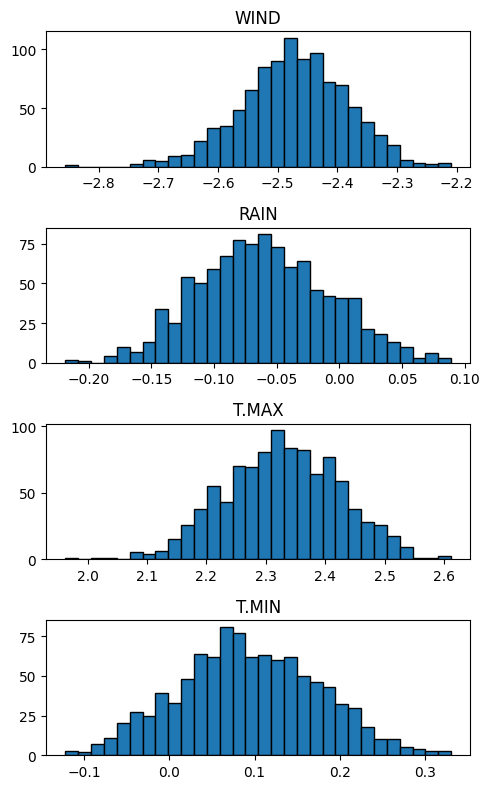

In [ ]:
# Applying for Bootstraping for LR
n_bootstrap = 1000
bootstrapped_importances = np.zeros((n_bootstrap, X.shape[1]))

for i in range(n_bootstrap):
    # Resample data with replacement
    resampled_data = wind_predict.sample(n=len(wind_predict), replace=True)
    X_resampled = resampled_data.drop('WeatherType', axis=1)
    y_resampled = resampled_data['WeatherType']

    logistic_resample = LogisticRegression(max_iter=1000)
    logistic_resample.fit(X_resampled, y_resampled)

    # Using coefficients as importances for demonstration
    bootstrapped_importances[i] = logistic_resample.coef_

# Plot the distributions
plt.figure(figsize=(5, 8))

for i, col in enumerate(X.columns):
    plt.subplot(X.shape[1], 1, i + 1)
    plt.hist(bootstrapped_importances[:, i], bins=30, edgecolor='k')
    plt.title(col)
    plt.tight_layout()

plt.show()


 The histograms show the distribution of feature importances (coefficients in the case of logistic regression) across the bootstrapped samples. This gives an idea of the variability and stability of the importance of each feature.

### 2. Random Forest Classifier

In [ ]:
# import Random Forest
from sklearn.ensemble import RandomForestClassifier

# accuracy_score import from sklearn
from sklearn.metrics import accuracy_score

# Say rf is the random classifier
rf =  RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# y_pred_rf regarding X_test valuse
y_predict_rf = rf.predict(X_test)
y_predict_rf

array([1, 0, 1, ..., 0, 0, 0])

### regularization of RF

LR is a parametric linear model, while RF is a non-parametric ensemble of decision trees.  In RF, complexity is controlled by tree depth, number of trees, and other parameters. RF doesn't have traditional regularization. However, hyperparameters like max_depth and min_samples_split act to limit overfitting.

In [ ]:
# Create a Random Forest classifier
regularization_rf= RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees in the forest

# Train the model
regularization_rf.fit(X_train, y_train)

# Predict on test set
y_pred_legularization_rf = regularization_rf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred_legularization_rf)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


### Create visuals for Randon Forest (RF) model



ROC & AUC curve of RF

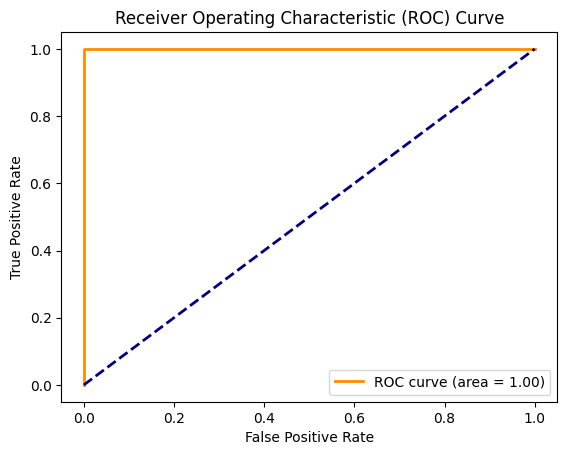

In [ ]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Now that the model is trained, you can use predict_proba
y_prob_rf = rf.predict_proba(X)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y, y_prob_rf)
roc_auc = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='g')
plt.show()

A diagonal line represents random guessing, and a curve closer to the top-left corner indicates better performance. The area under the ROC curve (AUC) quantifies the overall discriminative power of the model.

AUC measures the model's ability to distinguish between positive and negative classes. A value of 1 indicates perfect discrimination, while 0.5 suggests no better than random guessing. Higher AUC values indicate better model performance. Here, I got area under curve is 1, which is better model performance.

Precision and Recall curve for RF

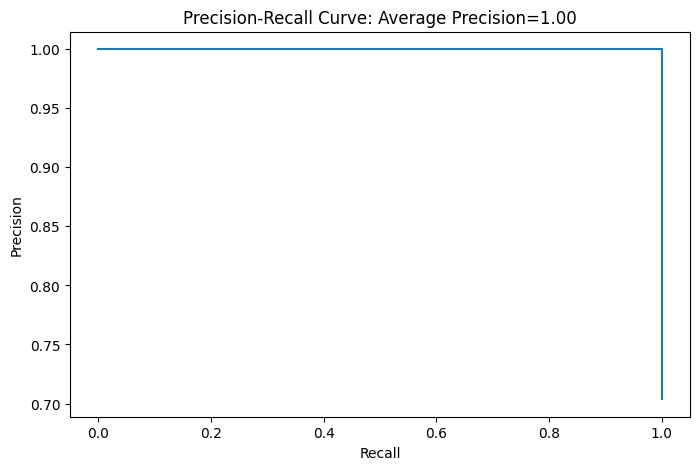

In [ ]:
# Some I repeated import libraries for avoiding error.
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision_rf, recall_rf, thresholds = precision_recall_curve(y, y_prob_rf)
average_precision_rf = average_precision_score(y, y_prob_rf)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.step(recall_rf, precision_rf, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve: Average Precision={average_precision_rf:.2f}')
#plt.fill_between(recall_rf, precision_rf, step='post', alpha=0.2, color='g')
plt.show()

In the plot, a high area under the curve represents both high precision and high recall, which is desirable. The average precision (AP) summarizes the shape of the curve, providing a single number to indicate the performance of the prediction. In this case, the average precision is 1.

Residuals plot of RF

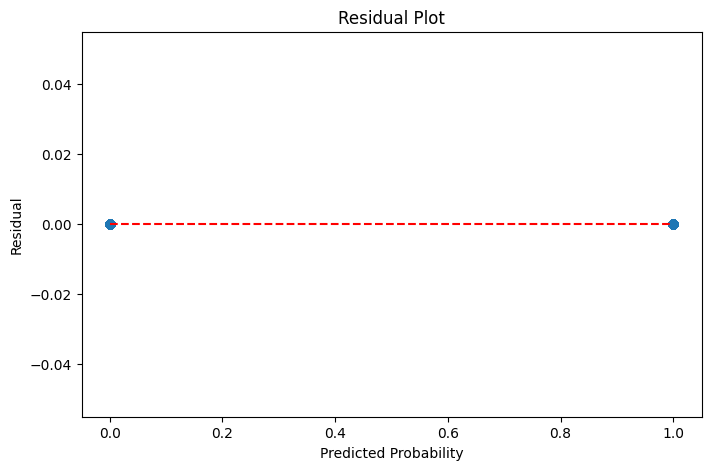

In [ ]:
# Residuals
residuals_rf = y_test - y_predict_rf

plt.figure(figsize=(8, 5))
plt.scatter(y_predict_rf, residuals_rf, alpha=0.5) # set alpha = 0.5
plt.xlabel('Predicted Probability')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.hlines(0, min(y_predict_rf), max(y_predict_rf), colors='r', linestyles='--')
plt.show()

### RF classification report and the confusion matrix

In [ ]:
# confusion matrix
cf_matrix_rf = confusion_matrix(y_predict_rf, y_test)
cf_matrix_rf

array([[393,   0],
       [  0, 890]])

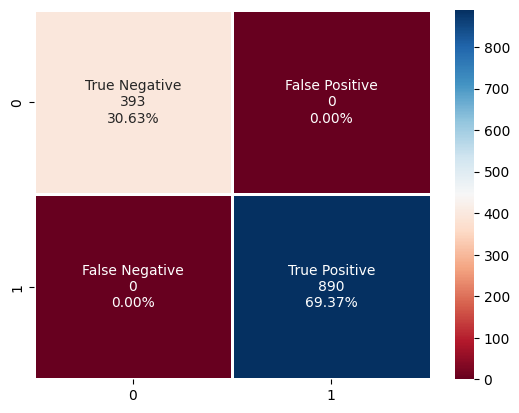

In [ ]:
# print the confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_rf.flatten()/np.sum(cf_matrix_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_rf, annot=labels, fmt='', linewidths=2 ,cmap='RdBu')
plt.savefig("confuMatrix_LR.png", bbox_inches='tight')

In [ ]:
#Classification report fro RF:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       890

    accuracy                           1.00      1283
   macro avg       1.00      1.00      1.00      1283
weighted avg       1.00      1.00      1.00      1283



This report offers a comprehensive view of the classifier's performance across different classes.

Classification report for RF model:

Precision: Precision of the instances predicted as positive, how many were correctly predicted. Precision = True Positives / (True Positives + False Positives). Here, precision for '0' is 1 and precision for '1' is 1, which implies that a low rate of false positives.

Recall (Sensitivity): Recall 0f all actual positive instances, how many were correctly predicted. High recall indicates most actual positives are captured by the model. Recall = True Positives / (True Positives + False Negatives). I got recall 1 here.

F1-Score: Harmonic mean of precision and recall, providing a balance between the two. Ranges between 0 (worst) and 1 (best). A higher F1 score indicates better model performance. So, this model performed better acording the F1-Score.

Support: Number of actual occurrences of each class in the dataset.

Accuracy: Overall percentage of correctly predicted instances. Here, accuracy is 1.


### Calculate and visualize feature importance of RF

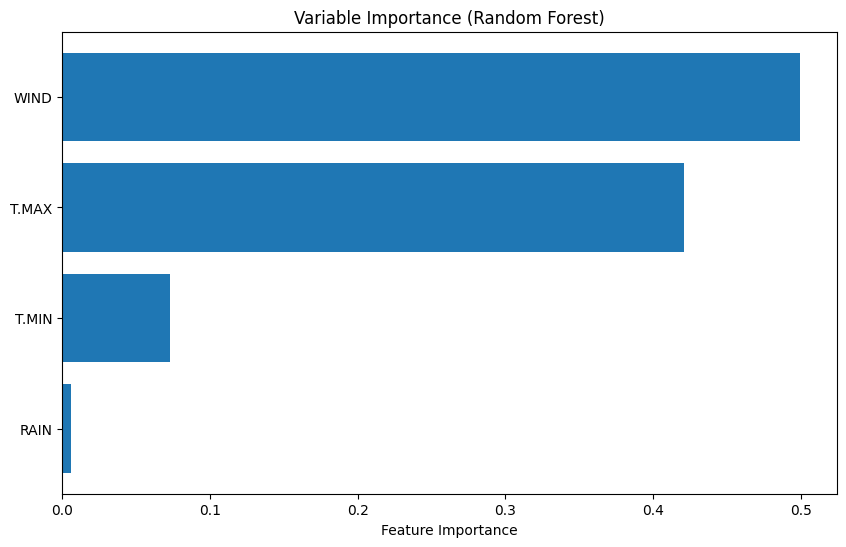

In [ ]:
# Get feature importance from coefficients
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Variable Importance (Random Forest)')
plt.show()

In this Figure, the feature importance is visualized in a horizontal bar chart. Features with larger coefficients (in magnitude) will have longer bars, implying greater importance in the model. For example, WIND feature has greater importance.

Permutaation important features

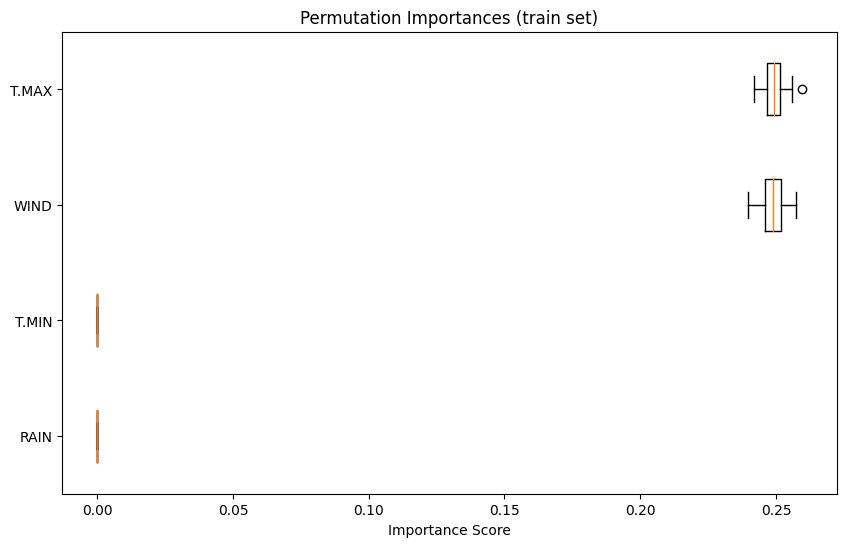

In [ ]:
#from sklearn.inspection import permutation_importance

# Calculate permutation importances
result = permutation_importance(rf, X, y, n_repeats=30, random_state=42)
sorted_idx = result.importances_mean.argsort()

# Visualize the permutation importances
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(X.columns)[sorted_idx])
plt.title("Permutation Importances (train set)")
plt.xlabel("Importance Score")
plt.show()

In this box plot, It is indicating that both T.MAX and WIND features are important, where this message is getting after applying permutation importance.

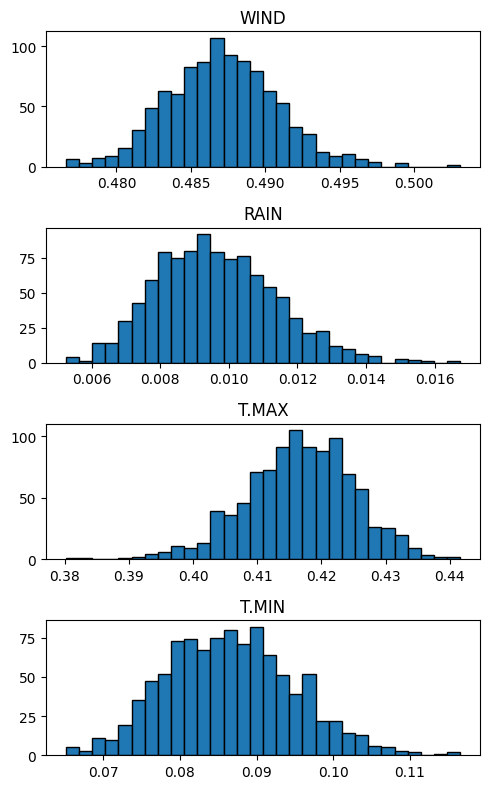

In [ ]:
#Number of bootstraping is 1000
n_bootstrap = 1000
bootstrapped_importances = np.zeros((n_bootstrap, X.shape[1]))

for i in range(n_bootstrap):
#     # Resample data with replacement
    resampled_data = wind_predict.sample(n=len(wind_predict), replace=True)
    X_resampled = resampled_data.drop('WeatherType', axis=1)
    y_resampled = resampled_data['WeatherType']

    # Fit a random forest model to the resampled data
    rf_resample = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_resample.fit(X_resampled, y_resampled)

    # Get feature importances from the random forest model
    bootstrapped_importances[i] = rf_resample.feature_importances_

# Plot the distributions of the bootstrapped feature importances
plt.figure(figsize=(5, 8))

for i, col in enumerate(X.columns):
    plt.subplot(X.shape[1], 1, i + 1)
    plt.hist(bootstrapped_importances[:, i], bins=30, edgecolor='k')
    plt.title(col)
    plt.tight_layout()

plt.show()



As we can see these plots, all the features are looking very close to gausian distributiin, That's whay I like bootstrapping. But the limitation of this resamppling is computationally expensive.  

### KNN model

In [ ]:
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# accuracy_score import from sklearn
from sklearn.metrics import accuracy_score

# Say rf is the random classifier
knn =  KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 1, ..., 0, 0, 0])

Regularization for KNN

In [ ]:
# Create a KNN classifier. Let's choose n_neighbors=3 for this example
regularization_knn = KNeighborsClassifier(n_neighbors=3)

# Train the model (in the case of KNN, this is just storing the data)
regularization_knn.fit(X_train, y_train)

# Predict on test set
y_pred_legularization_knn = regularization_knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred_legularization_knn)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.65%


<Figure size 640x480 with 0 Axes>

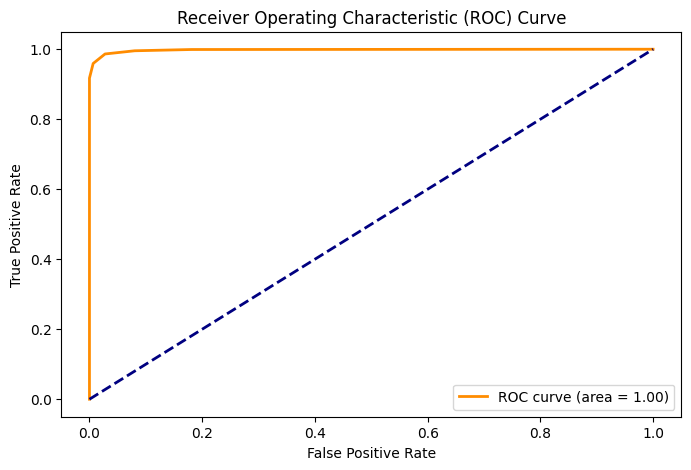

In [ ]:
#Now that the model is trained, you can use predict_proba
y_prob_knn = knn.predict_proba(X)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y, y_prob_knn)
roc_auc = auc(fpr_knn, tpr_knn)

# Plot the ROC curve
plt.figure()
plt.figure(figsize=(8, 5))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

KNN models for this dataset shows that the area under the curve is 1.

Precision and recall curve for KNN

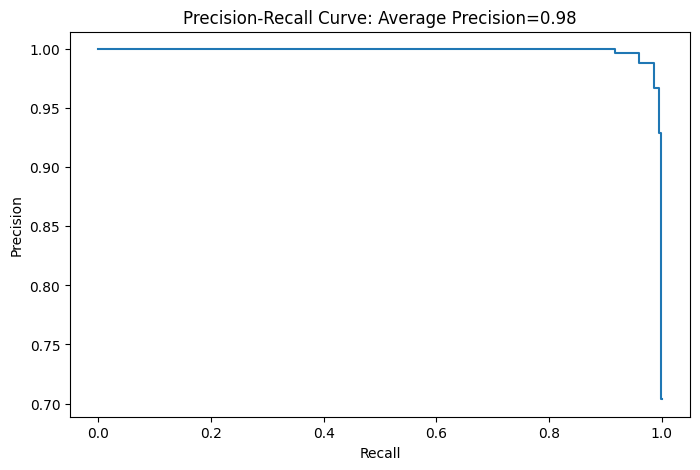

In [ ]:
# import libraries
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y, y_prob_knn)
average_precision_knn = average_precision_score(y, y_prob_rf)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.step(recall_knn, precision_knn, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve: Average Precision={average_precision:.2f}')
plt.show()

In the plot, a high area under the curve represents both high precision and high recall, which is desirable. The average precision (AP) summarizes the shape of the curve, providing a single number to indicate the performance of the prediction. In this case, the average precision is 1.

Residuals for KNN

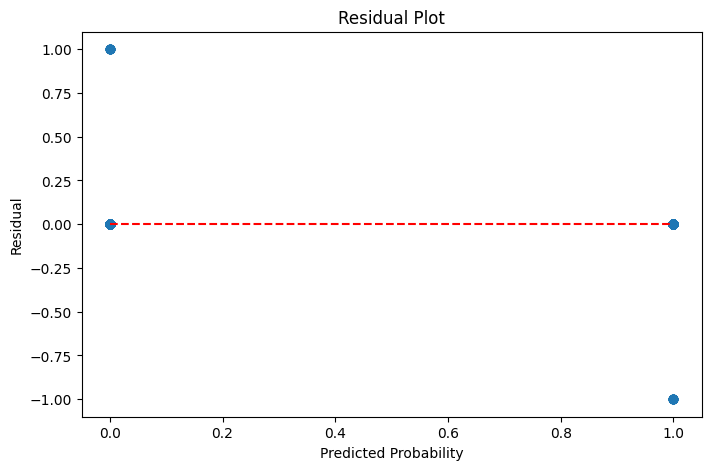

In [ ]:
# Risuads for KNN
residuals_knn = y_test - y_pred_knn

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_knn, residuals_knn, alpha=0.5) # say alpha = 0.5
plt.xlabel('Predicted Probability')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.hlines(0, min(y_pred_knn), max(y_pred_knn), colors='r', linestyles='--')
plt.show()

Confusion Matrix

In [ ]:
# confusion matrix
cf_matrix_knn = confusion_matrix(y_pred_knn, y_test)
cf_matrix_knn

array([[372,  20],
       [ 21, 870]])

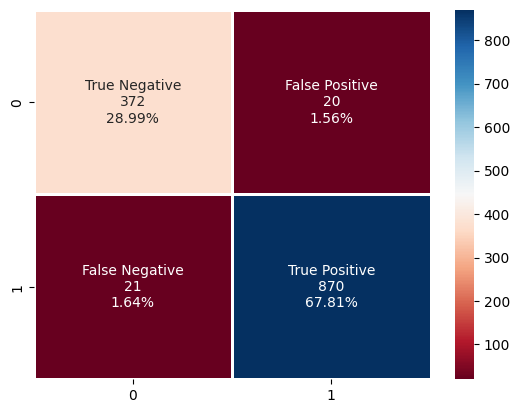

In [ ]:
# print the confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_knn.flatten()/np.sum(cf_matrix_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_knn, annot=labels, fmt='', linewidths=2 ,cmap='RdBu')
plt.savefig("confuMatrix_LR.png", bbox_inches='tight')

In [ ]:
#Classification report fro RF:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       393
           1       0.98      0.98      0.98       890

    accuracy                           0.97      1283
   macro avg       0.96      0.96      0.96      1283
weighted avg       0.97      0.97      0.97      1283



Classification report for KNN model:

Precision: Of the instances predicted as positive, how many were correctly predicted. Precision = True Positives / (True Positives + False Positives). Here, precision for '0' is 0.95 and precision for '1' is 0.98, which implies that a low rate of false positives.

Recall (Sensitivity): Of all actual positive instances, how many were correctly predicted. High recall indicates most actual positives are captured by the model. Recall = True Positives / (True Positives + False Negatives).

F1-Score: Harmonic mean of precision and recall, providing a balance between the two. Ranges between 0 (worst) and 1 (best). A higher F1 score indicates better model performance. So, this model performed better acording the F1-Score.

Support: Number of actual occurrences of each class in the dataset.

Accuracy: Overall percentage of correctly predicted instances. Here, accuracy is 0.97.


### Calculate and visualize feature importance of KNN

K-Nearest Neighbors (KNN) does not inherently provide a measure of feature importance. KNN makes predictions based on majority voting (for classification) or averaging (for regression) from the "K" most similar instances in the training data, and it determines similarity through distance measures (e.g., Euclidean distance). Every feature contributes to the distance calculation equally unless the data is scaled or weighted in some way.

Even though KNN does not have an intrinsic way to evaluate feature importance, we can use model-agnostic methods to estimate it:

Permutation Importance: After a model is fitted, the importance of a feature is calculated by permuting the values of the feature and measuring the decrease in model performance (e.g., accuracy for classification).

Permutation importnat features

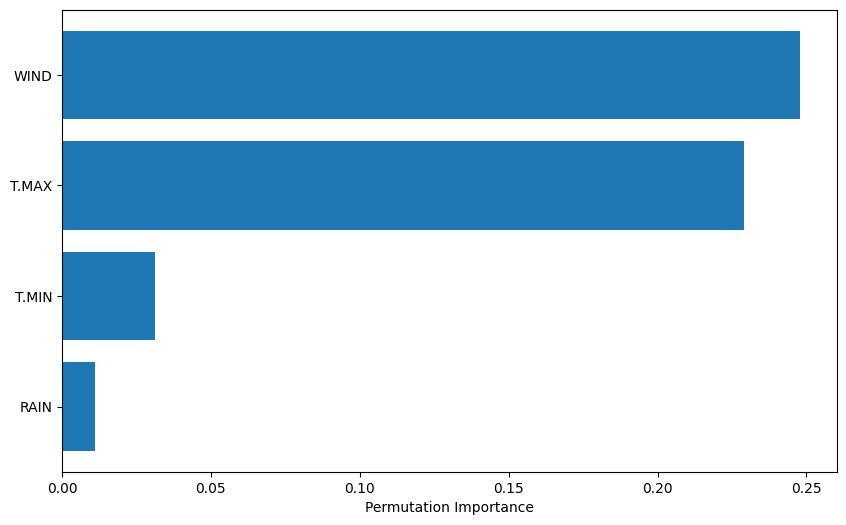

In [ ]:
# import libraries
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

knn.fit(X_train, y_train)

# Calculate permutation importances
results_knn = permutation_importance(knn, X_train, y_train, scoring='accuracy')

# Get importance and indices
importances_knn = results_knn.importances_mean
indices_knn = np.argsort(importances_knn)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importances_knn[indices_knn])
plt.yticks(range(X_train.shape[1]), X_train.columns[indices_knn])
plt.xlabel('Permutation Importance')
plt.show()


In this Figure, the feature importance is visualized in a horizontal bar chart. Features with larger coefficients (in magnitude) will have longer bars, implying greater importance in the model. For example, WIND feature has greater importance.

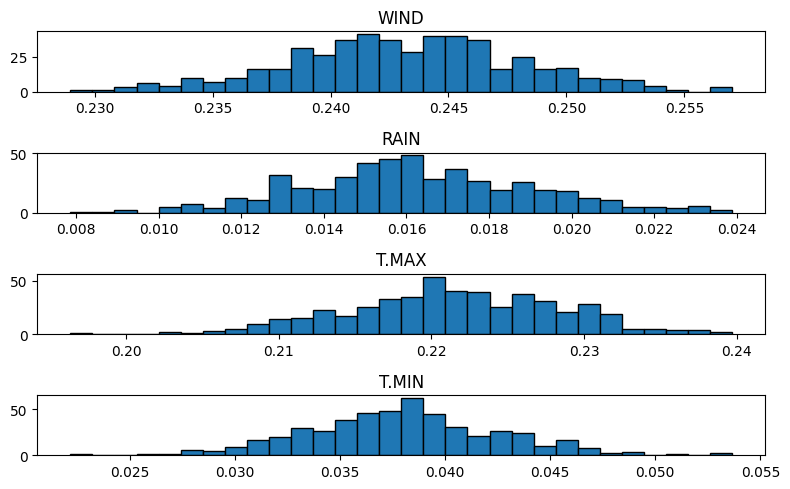

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn = KNeighborsClassifier()

# Number of bootstraps
n_bootstrap = 500

# Store feature importances for all bootstraps
feature_importances = np.zeros((n_bootstrap, X_train.shape[1]))

for i in range(n_bootstrap):
    # Resample data with replacement
    resampled_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
    X_resampled_rf = X_train.loc[resampled_indices]
    y_resampled_rf = y_train.loc[resampled_indices]

    # Fit the model
    knn.fit(X_resampled_rf, y_resampled_rf)

    # Get permutation importances
    result_rf = permutation_importance(knn, X_resampled_rf, y_resampled_rf, n_repeats=30, random_state=0)
    feature_importances[i] = result_rf.importances_mean

# Plotting the distributions of importances
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for i, col in enumerate(X_train.columns):
    plt.subplot(X_train.shape[1], 1, i + 1)
    plt.hist(feature_importances[:, i], bins=30, edgecolor='k')
    plt.title(col)
    plt.tight_layout()

plt.show()


Note that the number of resample should be large number otherwise bootstraping will not work well.

## Question 02

Comparison the accuracy beteen thee three models

In [ ]:
Accuracy = pd.DataFrame({'Models': ['LR', 'RF', 'KNN'], 'ACC': [accuracy_score(y_test, y_predict_lr),  accuracy_score(y_test, y_predict_rf), accuracy_score(y_test, y_pred_knn)]})
Accuracy

,Models,ACC
0,LR,0.879969
1,RF,1.000000
2,KNN,0.968044


In the above matrix, I made a dataframe of the accuracy scores of the three machine learning models, which clearly depicts the score values. Based on the data frame, we can easily tell the accuracy score and relate it to the ML model.

Comparionson Models through Histogram plot

Text(0, 0.5, 'Accuracy')

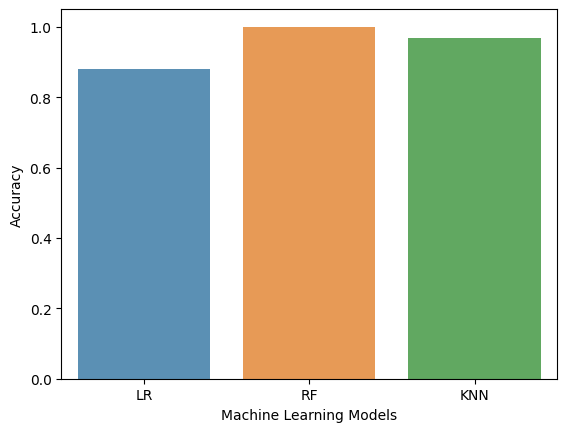

In [ ]:
sns.barplot(x= Accuracy['Models'], y= Accuracy['ACC'], alpha=0.8)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")

In this assignment, three machine learning algorithms likeLogistic Regression (LR), Random Forest Classifier (RF), and  k-Nearest-Neighbors (KNN) are studied broadly. The accuracy rate of each algorithm has been measured, and selects the algorithm withthe highest accuracy. The accuracy rate is a correct prediction ratio to the total number of given datasets. It can be written as

Accuracy - TP+TN/(TP+FP+FN+TN)

See the histogram plot for accuracy score of the ML models.

Based on the accuracy bar chart:

LR does a good job, getting things right a bit more than 80% of the time. But, it's not the best among the three and might make some mistakes. RF does even better, being right close to 90% of the time. This means it's pretty good at predicting on the data it was tested on. However, it's not perfect and might still miss out on some patterns. KNN is really strong, with its accuracy just a bit below 90%. But as we use more and more data, KNN might slow down and might not always be the best choice for different types of data.

Out of the three, RF seems to be the best option, with KNN following closely and LR after that. If I had to pick one based on how often they get things right, I'd go with RF.

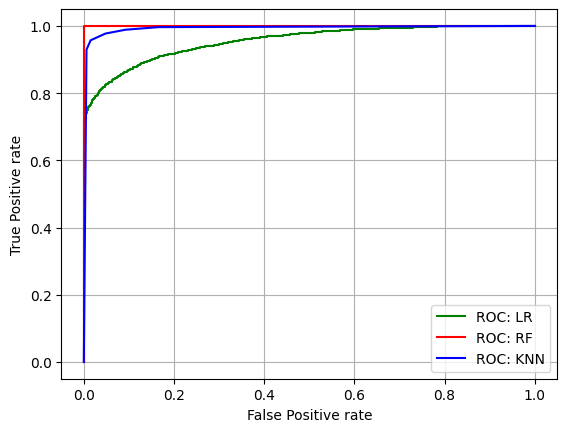

In [ ]:
# logistic regration
y_prob_logis = lr.predict_proba(X)[:, 1]  # Probability estimates for the positive class
fpr, tpr, _ = roc_curve(y, y_prob_logis)

# Now that the model is trained, you can use predict_proba: rf
y_prob_rf = rf.predict_proba(X)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y, y_prob_rf)

# knn
#Now that the model is trained, you can use predict_proba
y_prob_knn = knn.predict_proba(X)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y, y_prob_knn)

plt.plot(fpr, tpr, color='green', label = "ROC: LR")
plt.plot(fpr_rf, tpr_rf, color='red', label = "ROC: RF")
plt.plot(fpr_knn, tpr_knn, color='blue', label = "ROC: KNN")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.legend()
plt.grid()
plt.show()

Based on the ROC curve:

Analyzing the Precision-Recall curve offers valuable insights into the performance of three machine learning models. The green curve, representing Logistic Regression, gravitates towards the top-left corner, indicative of an impressive true positive rate and minimal false positives. However, its slight deviation from the corner suggests occasional misclassifications. Meanwhile, the Random Forest, portrayed by the red curve, commences ideally on the top-left corner, signifying its robustness. Yet, a potential concern arises as the curve hints at RF possibly compromising some true positives for reduced false positives. The blue curve of KNN takes a middle ground between LR and RF, achieving a balance but not optimizing the true positive rate as effectively as RF. Evaluating these findings, the RF model appears superior, given its optimal trade-off between true positive and false positive rates. Hence, considering its proximity to the top-left corner, the RF model emerges as the most recommended for its balance between sensitivity and specificity.

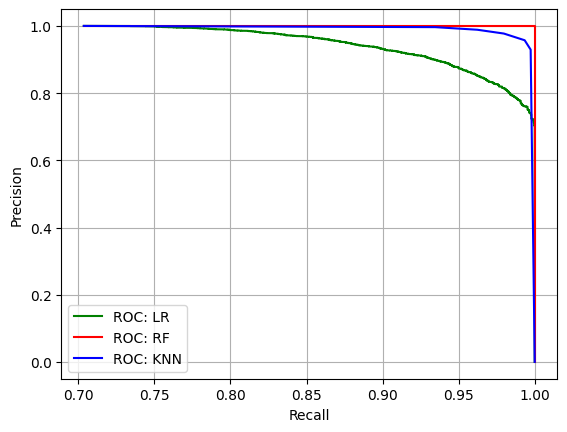

In [ ]:
# logistic regration
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_prob_logis)
average_precision = average_precision_score(y, y_prob_logis)

# Now that the model is trained, you can use predict_proba: rf
# Calculate precision-recall curve
precision_rf, recall_rf, thresholds = precision_recall_curve(y, y_prob_rf)
average_precision = average_precision_score(y, y_prob_rf)

# knn-Calculate precision-recall curve
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y, y_prob_knn)
average_precision_knn = average_precision_score(y, y_prob_rf)

plt.plot(precision, recall, color='green', label = "ROC: LR")
plt.plot(precision_rf, recall_rf, color='red', label = "ROC: RF")
plt.plot(precision_knn, recall_knn, color='blue', label = "ROC: KNN")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend()
plt.grid()
plt.show()

Based on the Precision-Recall curve:

The Precision-Recall curve provides a clear comparative visualization of three machine learning models. For Logistic Regression, as the green curve demonstrates, it begins below RF and KNN in terms of precision but retains a steady precision as recall rises. However, a discernible weakness of LR is its lower initial precision, hinting at potential misclassifications of more positive samples at lesser thresholds. In contrast, the RF model, illustrated by the red curve, stands out as the top performer, displaying higher precision across various recall values. On the other hand, KNN, shown by the blue curve, commences with impeccable precision and sustains it across extensive recall levels, yet it lags behind RF in initial precision. Analyzing the curve, RF emerges as the most optimal model, combining both precision and recall proficiently, thus minimizing false positives. While LR and KNN exhibit commendable performance, they don't match the consistency of RF, particularly at elevated recall intervals.

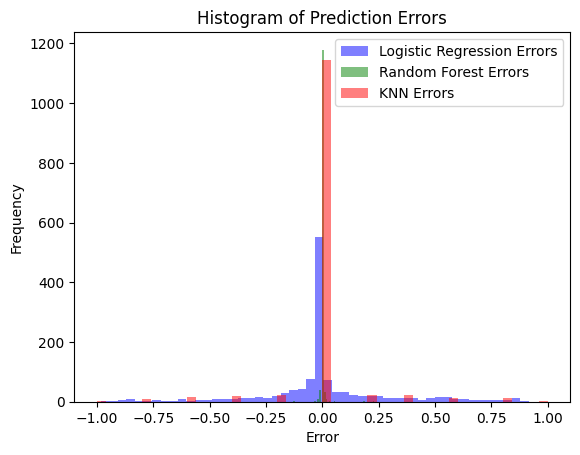

In [ ]:
# Compute the error from the respective models:
# Predict probabilities for the test set
y_prob_lrmodel = lr.predict_proba(X_test)[:, 1]  # Taking the probabilities for the positive class
y_prob_rfmodel = rf.predict_proba(X_test)[:, 1]
y_prob_knnmodel = knn.predict_proba(X_test)[:, 1]

logistic_errors = y_prob_lrmodel - y_test
rf_errors = y_prob_rfmodel - y_test
knn_errors = y_prob_knnmodel - y_test

# Set bin=30.
plt.hist(logistic_errors, bins=50, alpha=0.5, label="Logistic Regression Errors", color='blue')
plt.hist(rf_errors, bins=50, alpha=0.5, label="Random Forest Errors", color='green')
plt.hist(knn_errors, bins=50, alpha=0.5, label="KNN Errors", color='red')
plt.legend(loc='upper right')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()


Here's a summarized analysis of the histogram plot:

The histogram plot offers insightful analysis into the performance of three machine learning models. For Logistic Regression, the errors primarily hover around zero, signaling its accurate predictions, although minor deviations from true values exist. Random Forest shows a similar pattern, with errors densely packed around zero, indicating its aptness on the test data. However, it occasionally produces larger errors, as its distribution is somewhat broader than that of Logistic Regression. Contrarily, KNN consistently overpredicts, evident from the peak near the 1.0 error mark, suggesting potential misclassifications. This bias in KNN is a glaring issue, hinting it might not adapt well to varied datasets. Comparatively, both Logistic Regression and Random Forest are commendable, given their minimal prediction errors. Yet, considering the finer error distribution in RF, it would be the recommended choice for consistent and precise outcomes.

In [1]:
##################################################################################################